In [1]:
# Importing the Keras libraries and packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense
 

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('Hellmet/training',target_size = (64, 64),class_mode = 'binary')

Found 647 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Hellmet/testing',target_size = (64, 64),class_mode = 'binary')


Found 208 images belonging to 2 classes.


In [17]:
label_map = (test_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [18]:
classifier.fit(training_set,epochs = 5,validation_data = test_set  )

Epoch 1/5
21/21 [==============================] - 5s 191ms/step - loss: 0.6942 - accuracy: 0.5904 - val_loss: 0.5307 - val_accuracy: 0.8317
Epoch 2/5
21/21 [==============================] - 4s 167ms/step - loss: 0.5033 - accuracy: 0.7836 - val_loss: 0.5121 - val_accuracy: 0.7692
Epoch 3/5
21/21 [==============================] - 3s 158ms/step - loss: 0.3604 - accuracy: 0.8485 - val_loss: 0.2512 - val_accuracy: 0.9087
Epoch 4/5
21/21 [==============================] - 4s 170ms/step - loss: 0.2980 - accuracy: 0.8856 - val_loss: 0.2130 - val_accuracy: 0.9087
Epoch 5/5
21/21 [==============================] - 3s 159ms/step - loss: 0.2546 - accuracy: 0.8964 - val_loss: 0.1935 - val_accuracy: 0.9231


In [16]:
## inference
import numpy as np
from tensorflow.keras.preprocessing import image
#test_image= image.load_img('inference/abn.jpg' ,target_size =(64,64))
test_image= image.load_img('Hellmet/inference/221.jpg' ,target_size =(64,64))

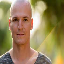

In [17]:
test_image

In [18]:
## Convert image to array
test_image = image.img_to_array(test_image)
test_image=test_image.reshape(1,64,64,3)

In [19]:
result = classifier.predict(test_image)

In [20]:
result

array([[1.]], dtype=float32)

In [21]:
result

array([[1.]], dtype=float32)

In [22]:
result=np.around(result)

In [23]:
result

array([[1.]], dtype=float32)

In [24]:
if result == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'

In [25]:
prediction

'without helmet'